# Churn Analysis

# 1. Import relevant libraries

In [ ]:
# Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# sklearn modules for data preprocessing-------------------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

# from sklearn import feature_selection
from sklearn import model_selection

# from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
import random
import os
import re
import sys
import timeit
import string
from datetime import datetime

# 2. Import dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling.csv')

# 3. Evaluate Data Structure

In [ ]:
# Evaluate data structure
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.drop(columns='RowNumber', axis=1, inplace=True)

In [ ]:
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.shape

(10000, 13)

In [ ]:
dataset.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
dataset.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Unique values in each categorical variable:

dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# 4. Check Target Variable Distribution

In [ ]:
# Check Target Variable Distribution -----------------------------------------------

dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# 5. Label Encode

In [ ]:
#Step 8: label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            print(col)
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

Gender
1 columns were label encoded.


In [ ]:
dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


# 6. Exploratory Data Analysis

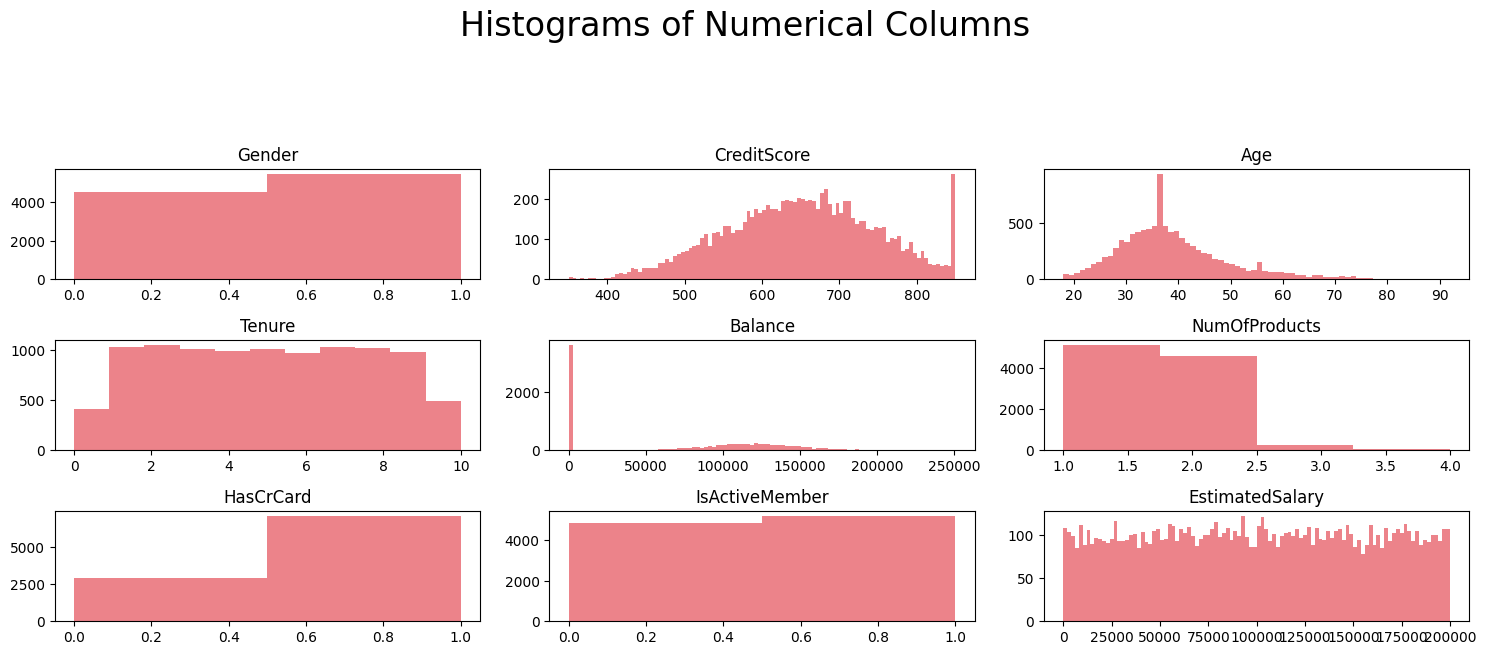

In [ ]:
# Exploratory Data Analysis----------------------------------------------------------------------

#1. Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[['Gender', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary']]

#Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

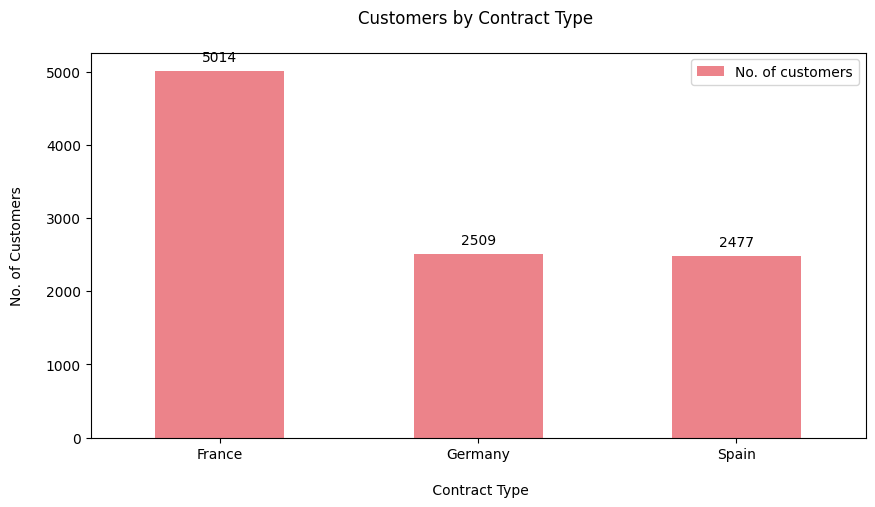

In [ ]:
# Analyze distribution of Key Categorical Variables---------------------------------------------


#(1) Distribution of Geography Type----------------------------------------------------------------------------------------

geography_split = dataset[[ "CustomerId", "Geography"]]
sectors = geography_split .groupby ("Geography")
geography_split = pd.DataFrame(sectors["CustomerId"].count())
geography_split.rename(columns={'CustomerId':'No. of customers'}, inplace=True)


ax =  geography_split[["No. of customers"]].plot.bar(title = 'Customers by Geography', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(geography_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

<ipython-input-16-8b6be6582a20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Exited"] == 0), "No", "Yes"))


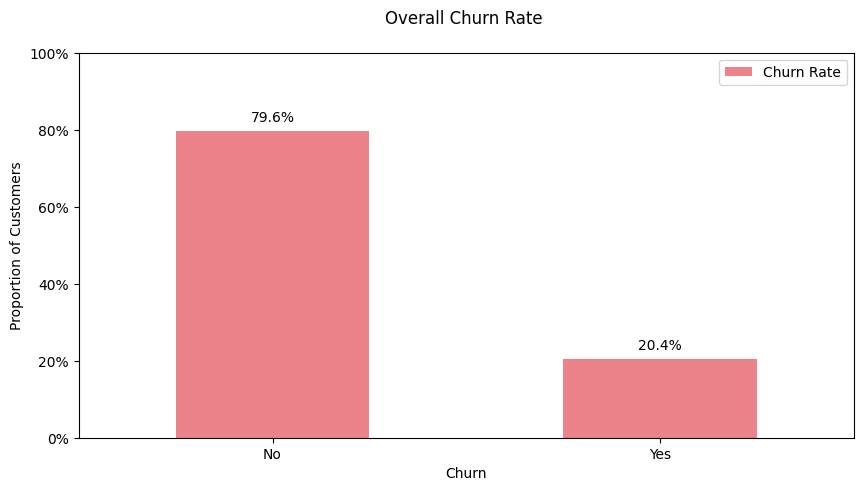

In [ ]:
# Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------

import matplotlib.ticker as mtick
churn_rate = dataset[["Exited", "CustomerId"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Exited"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["CustomerId"].count())
churn_rate ["Churn Rate"] = (churn_rate ["CustomerId"] / sum(churn_rate ["CustomerId"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color = '#ec838a', stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["CustomerId"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

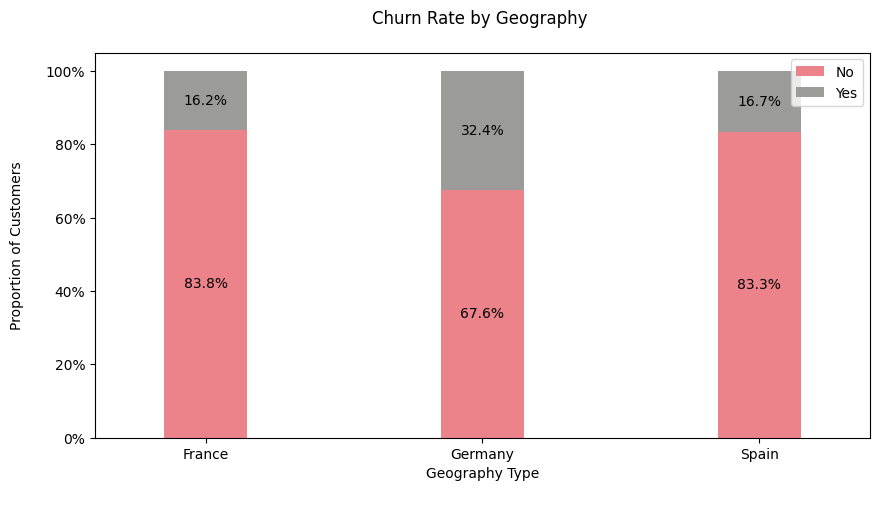

In [ ]:
import matplotlib.ticker as mtick

geography_churn = dataset.groupby(['Geography','Exited']).size().unstack()

geography_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (geography_churn.T*100.0 / geography_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,5),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Geography Type\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Churn Rate by Geography \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

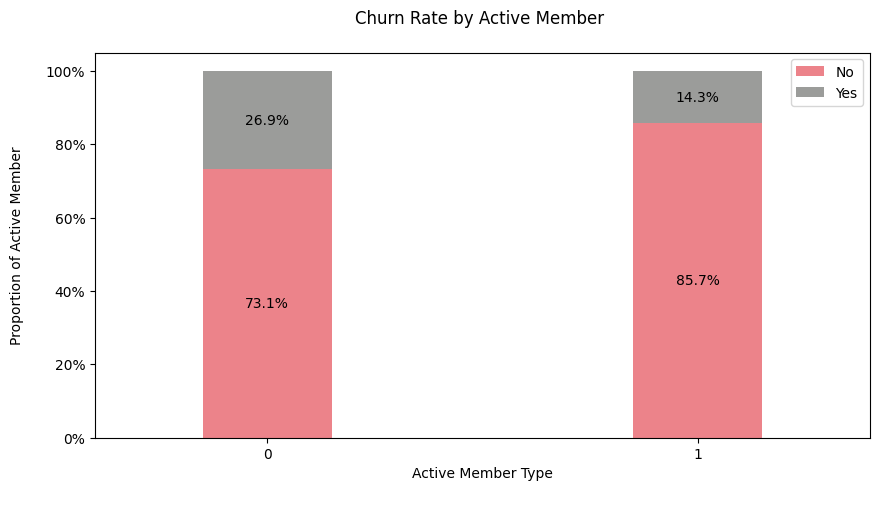

In [ ]:
import matplotlib.ticker as mtick

member_churn = dataset.groupby(['IsActiveMember','Exited']).size().unstack()

member_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (member_churn.T*100.0 / member_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,5),
                                                                color = colors)





plt.ylabel('Proportion of Active Member\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Active Member Type\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Churn Rate by Active Member \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

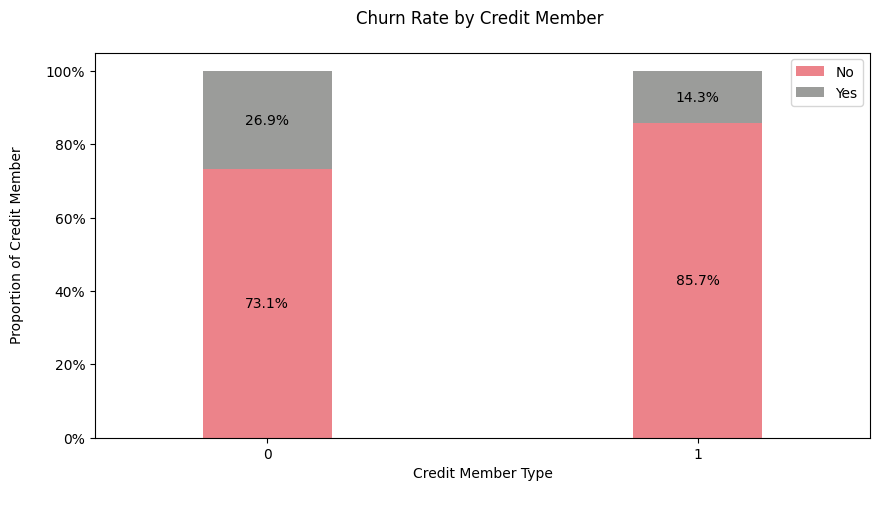

In [ ]:
import matplotlib.ticker as mtick

credit_churn = dataset.groupby(['HasCrCard','Exited']).size().unstack()

credit_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (member_churn.T*100.0 / member_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,5),
                                                                color = colors)





plt.ylabel('Proportion of Credit Member\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Credit Member Type\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Churn Rate by Credit Member \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

# 7. Encode Categorical data

In [ ]:
# label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 3 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 3:
            print(col)
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

Geography
1 columns were label encoded.


In [ ]:
dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# 8. Split Dataset into Dependent and Independent Variables

In [ ]:
# Split dataset into dependent and independent variables-----------------------------------

#identify response variable:

response = dataset["Exited"]

dataset = dataset.drop(columns="Exited")

In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 12)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 12)
Number transactions y_test dataset:  (2000,)


# 8. Removing Identifiers

In [ ]:
# Removing Identifiers-------------------------------------------------------------------

train_identity = X_train[['CustomerId', 'Surname']]
X_train = X_train.drop(columns=['CustomerId', 'Surname'])

test_identity = X_test[['CustomerId', 'Surname']]
X_test = X_test.drop(columns=['CustomerId', 'Surname'])

# 9. Feature Scalling

In [ ]:
# Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# 10. Modelling Selection

In [ ]:
#Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using StratifiedKFold
for name, model in models:
    kfold = model_selection.StratifiedKFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,85.16,1.53,85.96,1.02
0,Logistic Regression,75.61,2.04,69.91,1.38
1,Decision Tree Classifier,68.06,2.54,78.54,1.59


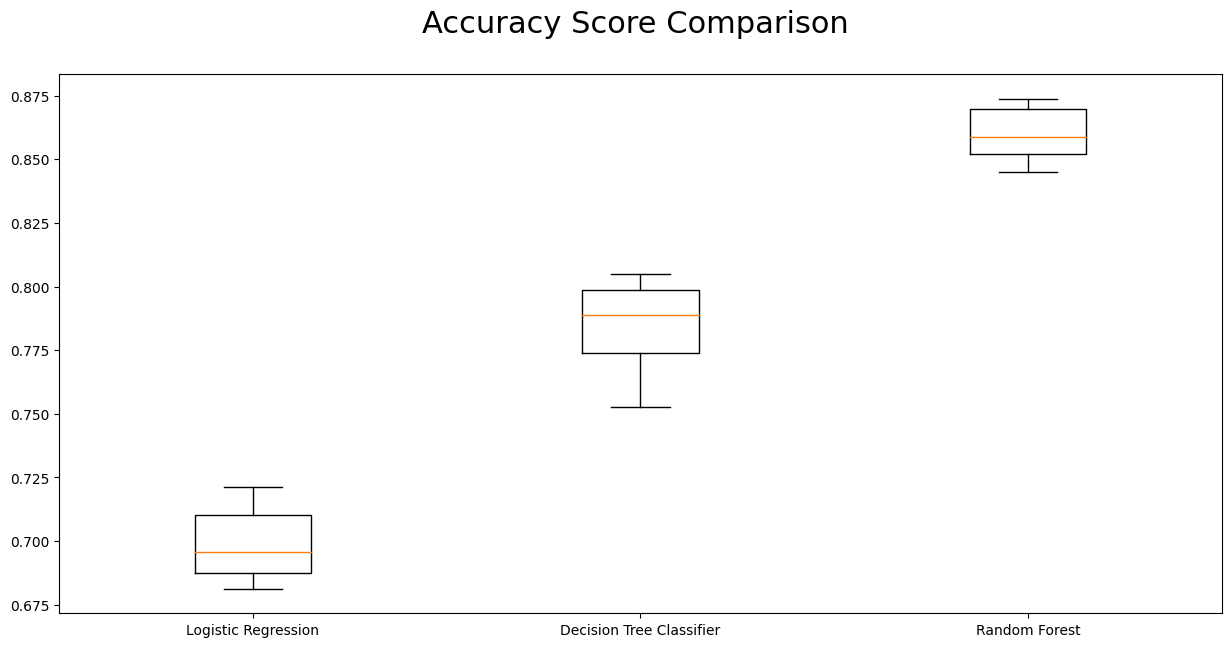

In [ ]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------


#Using Accuracy Mean:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

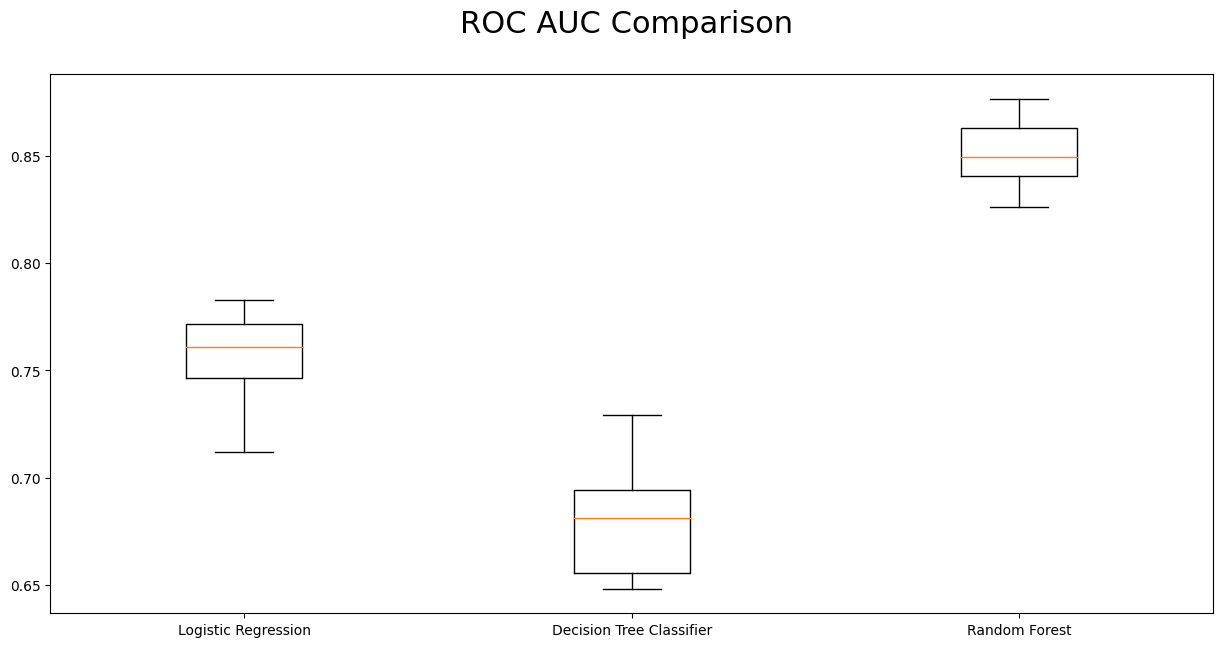

In [ ]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

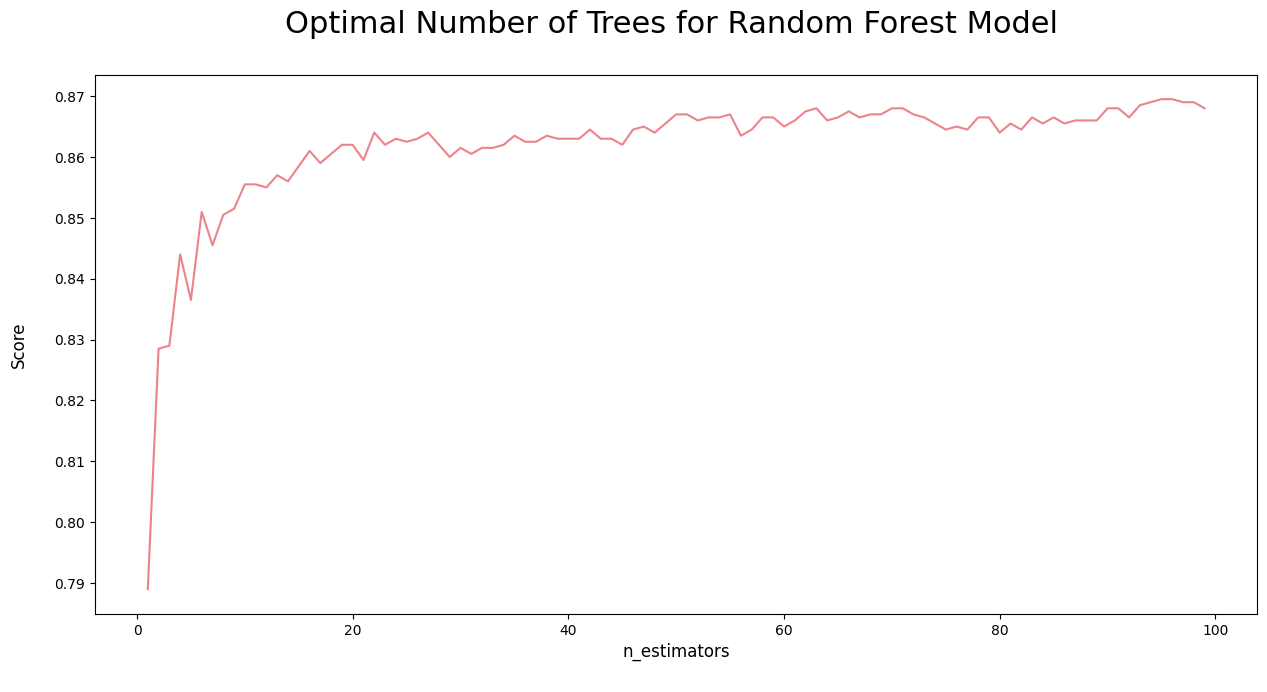

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 0)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('n_estimators\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
max = 0
i_max = -1

for index, score in enumerate(score_array):
  if score > max:
    max = score
    i_max = index

print(i_max, max)

94 0.8695


In [ ]:
# Compare Baseline Classification Algorithms - Second Iteration-----------------------------
#--1. Logistic Regression-----------------

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

#Step 15.4.6. Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 94, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-36-8d0f5dcff148>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)
<ipython-input-36-8d0f5dcff148>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:

# Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

#Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest     0.866   0.750916  0.506173  0.604720  0.541469
0  Logistic Regression     0.807   0.576000  0.177778  0.271698  0.206304
1        Decision Tree     0.788   0.478060  0.511111  0.494033  0.504140


# 11. Train & Evaluate Chosen Model

In [ ]:
#Train & evaluate Chosen Model---------------------------------------------


# Fit Random Forest on the Training dataset:
classifier = RandomForestClassifier(n_estimators = 94, criterion = 'entropy',random_state = 0)
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest     0.866   0.750916  0.506173   0.60472  0.541469


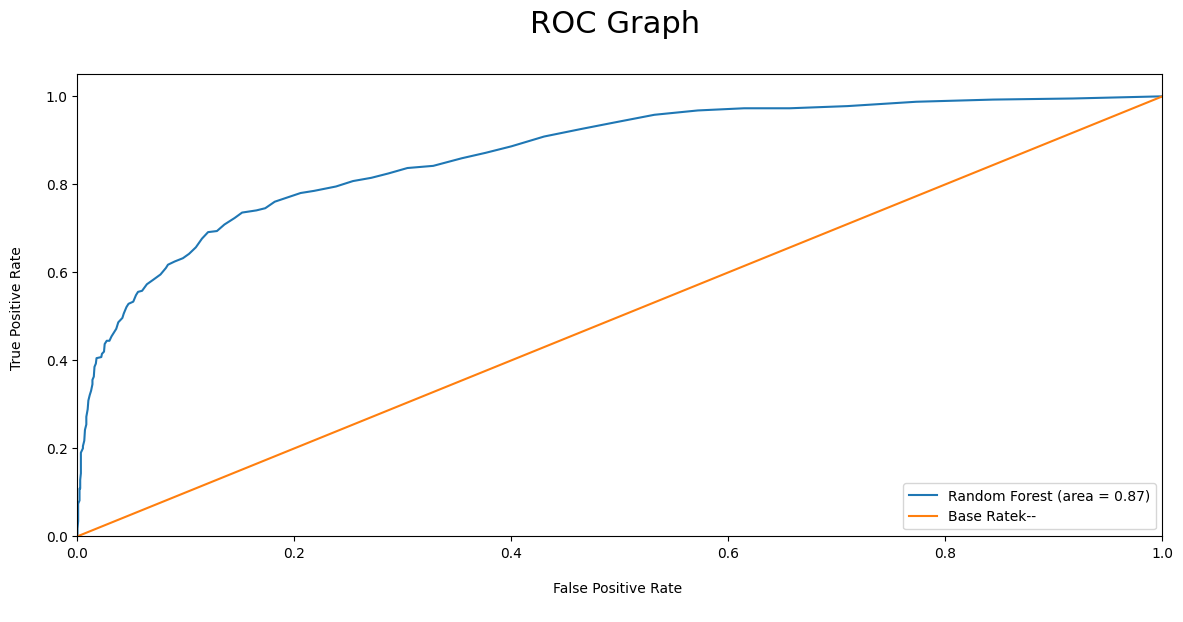

In [ ]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()